logspace:

11/22/2024 03:20:08 PM Total snapshots: 555
11/22/2024 03:20:09 PM Load IC file from all_ICs.json
11/22/2024 03:20:09 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
11/22/2024 03:20:09 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
11/22/2024 03:20:09 PM Number of parameters: 16
11/22/2024 03:20:09 PM Number of parameters: 16
11/22/2024 03:20:09 PM moved -1 steps out of 555 sims to find a non-nan median
11/22/2024 03:20:09 PM moved -1 steps out of 555 sims to find a non-nan median
11/22/2024 03:20:09 PM None
11/22/2024 03:20:09 PM None


╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value          │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0            │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (10,)   │ float64 │ [1., 1., 1.... │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0            │
╘═════════════════════════╧═══════════╧═

11/22/2024 03:20:11 PM trained hyperparameters: lengthscales: [9.56397668e-02 2.75537914e-01 1.51484091e+03 1.01030929e-01
 1.95220251e-01 8.91997950e-01 5.50384911e-01 5.95282660e+03
 2.17412684e+03 2.26822354e+03]
11/22/2024 03:20:11 PM trained hyperparameters: lengthscales: [9.56397668e-02 2.75537914e-01 1.51484091e+03 1.01030929e-01
 1.95220251e-01 8.91997950e-01 5.50384911e-01 5.95282660e+03
 2.17412684e+03 2.26822354e+03]
11/22/2024 03:20:11 PM trained hyperparameters: variance: 1.4887612339940308
11/22/2024 03:20:11 PM trained hyperparameters: variance: 1.4887612339940308
/home/qezlou/HD2/HETDEX/cosmo/pack_dev/private-HETDEX-cosmo/emu/plot.py:175: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 30)


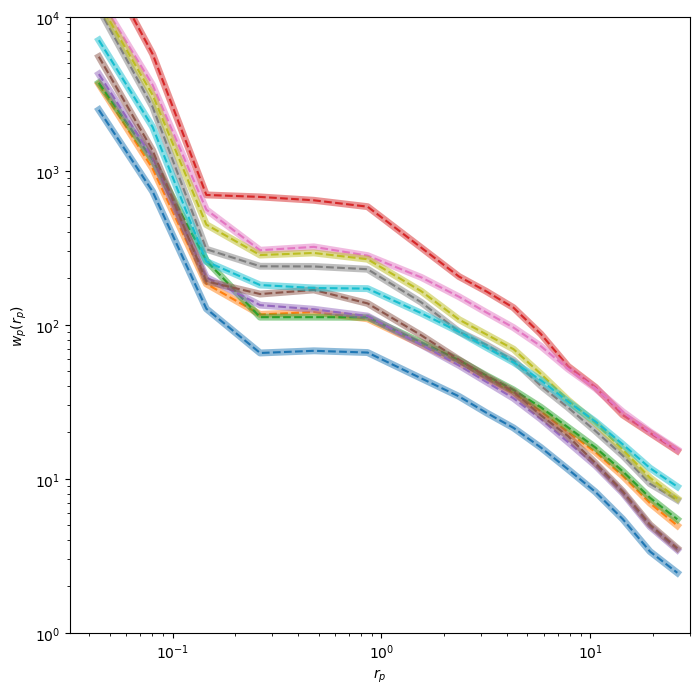

In [2]:
import importlib
import wp_emus
import plot
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(wp_emus)

loglog_single_fid = wp_emus.LogLogSingleFid(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/', fid='L2', logging_level='INFO')
pred, truth, rp = loglog_single_fid.train_pred_all_sims()

plot_emu = plot.PlotProjCorrEmu()

plot_emu.pred_truth(pred, truth, rp)

## LOO:

12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:04 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555
12/01/2024 03:27:05 PM Number of simualtions 555


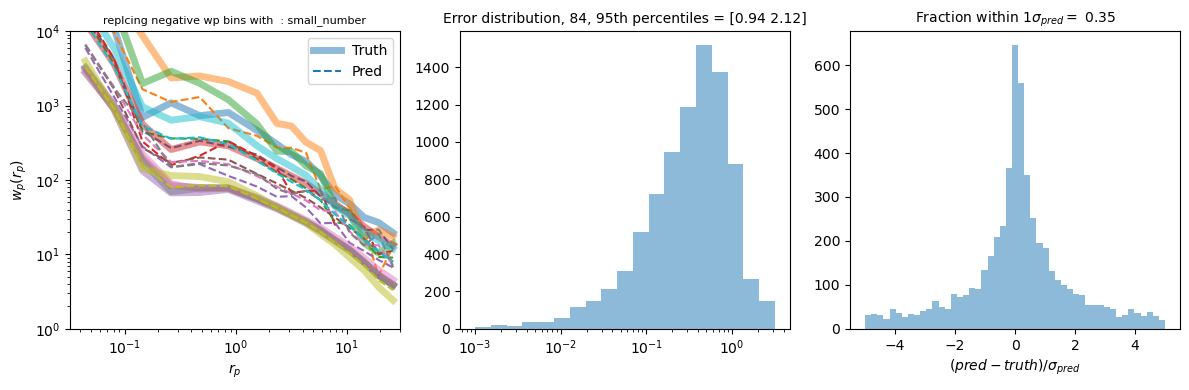

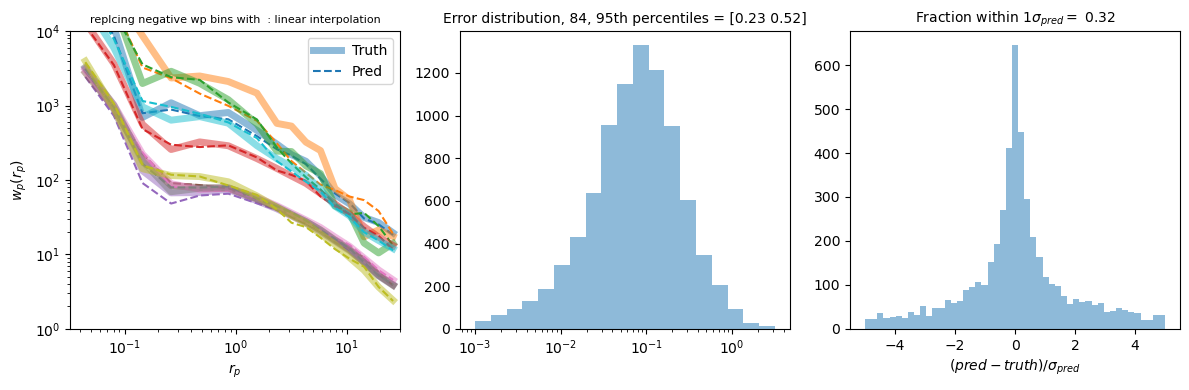

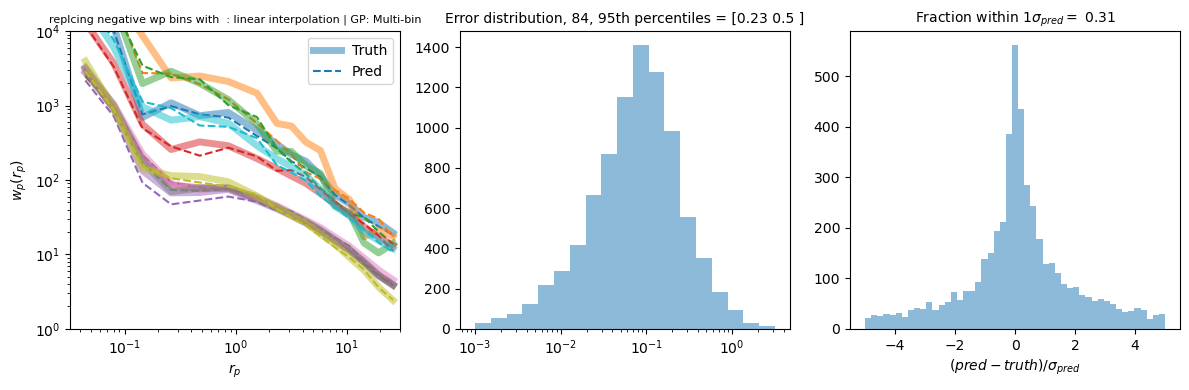

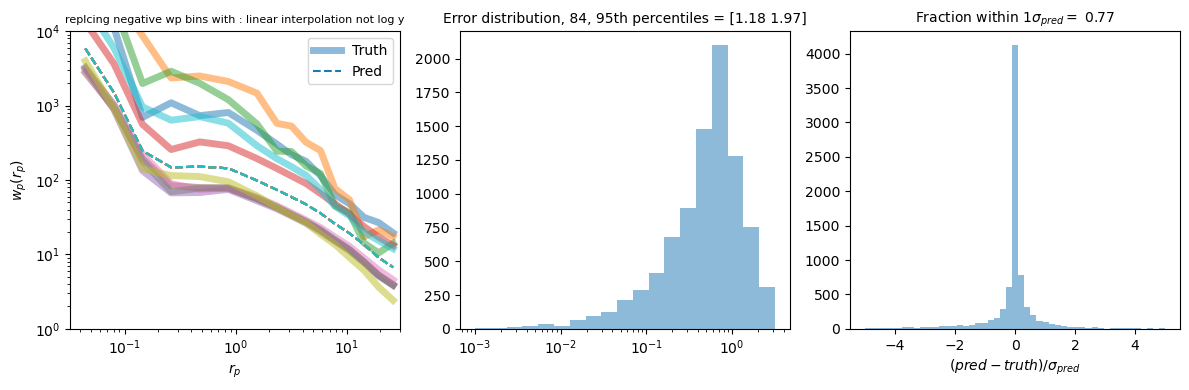

In [ ]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)

plot_wp_emu = plot.PlotProjCorrEmu()

seed = 153
savefile= '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile, seed=seed, title='replacing negative wp bins with  : small_number')

savefile= '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred_lin_interp.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile, seed=seed, title='replacing negative wp bins with  : linear interpolation')

savefile= '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred_lin_interp_multi_bin.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile, seed=seed, title='replacing negative wp bins with  : linear interpolation | GP: Multi-bin')

savefile = '/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected_corrected/train/loo_pred_lin_interp_not_log_y.hdf5'
plot_wp_emu.loo_pred_truth(savefile=savefile, seed=seed, title='replacing negative wp bins with : linear interpolation not log y', log_y=False)

## Parameter space:

11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Total snapshots: 555
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM Load IC file from all_ICs.json
11/27/2024 10:56:46 AM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
11/27/2024 10:56:46 AM X sha

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤════════════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value          │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪════════════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0            │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (10,)   │ float64 │ [1., 1., 1.... │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼────────────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0            │
╘═════════════════════════╧═══════════╧═

11/27/2024 10:56:48 AM trained hyperparameters: lengthscales: [1.05486540e-01 3.24950550e-01 8.30477168e+02 7.53654526e-02
 1.88835484e-01 4.98855481e-01 1.11818257e+03 2.30337354e+03
 9.85926980e+02 1.59322555e+03]
11/27/2024 10:56:48 AM trained hyperparameters: lengthscales: [1.05486540e-01 3.24950550e-01 8.30477168e+02 7.53654526e-02
 1.88835484e-01 4.98855481e-01 1.11818257e+03 2.30337354e+03
 9.85926980e+02 1.59322555e+03]
11/27/2024 10:56:48 AM trained hyperparameters: lengthscales: [1.05486540e-01 3.24950550e-01 8.30477168e+02 7.53654526e-02
 1.88835484e-01 4.98855481e-01 1.11818257e+03 2.30337354e+03
 9.85926980e+02 1.59322555e+03]
11/27/2024 10:56:48 AM trained hyperparameters: lengthscales: [1.05486540e-01 3.24950550e-01 8.30477168e+02 7.53654526e-02
 1.88835484e-01 4.98855481e-01 1.11818257e+03 2.30337354e+03
 9.85926980e+02 1.59322555e+03]
11/27/2024 10:56:48 AM trained hyperparameters: lengthscales: [1.05486540e-01 3.24950550e-01 8.30477168e+02 7.53654526e-02
 1.88835484e-

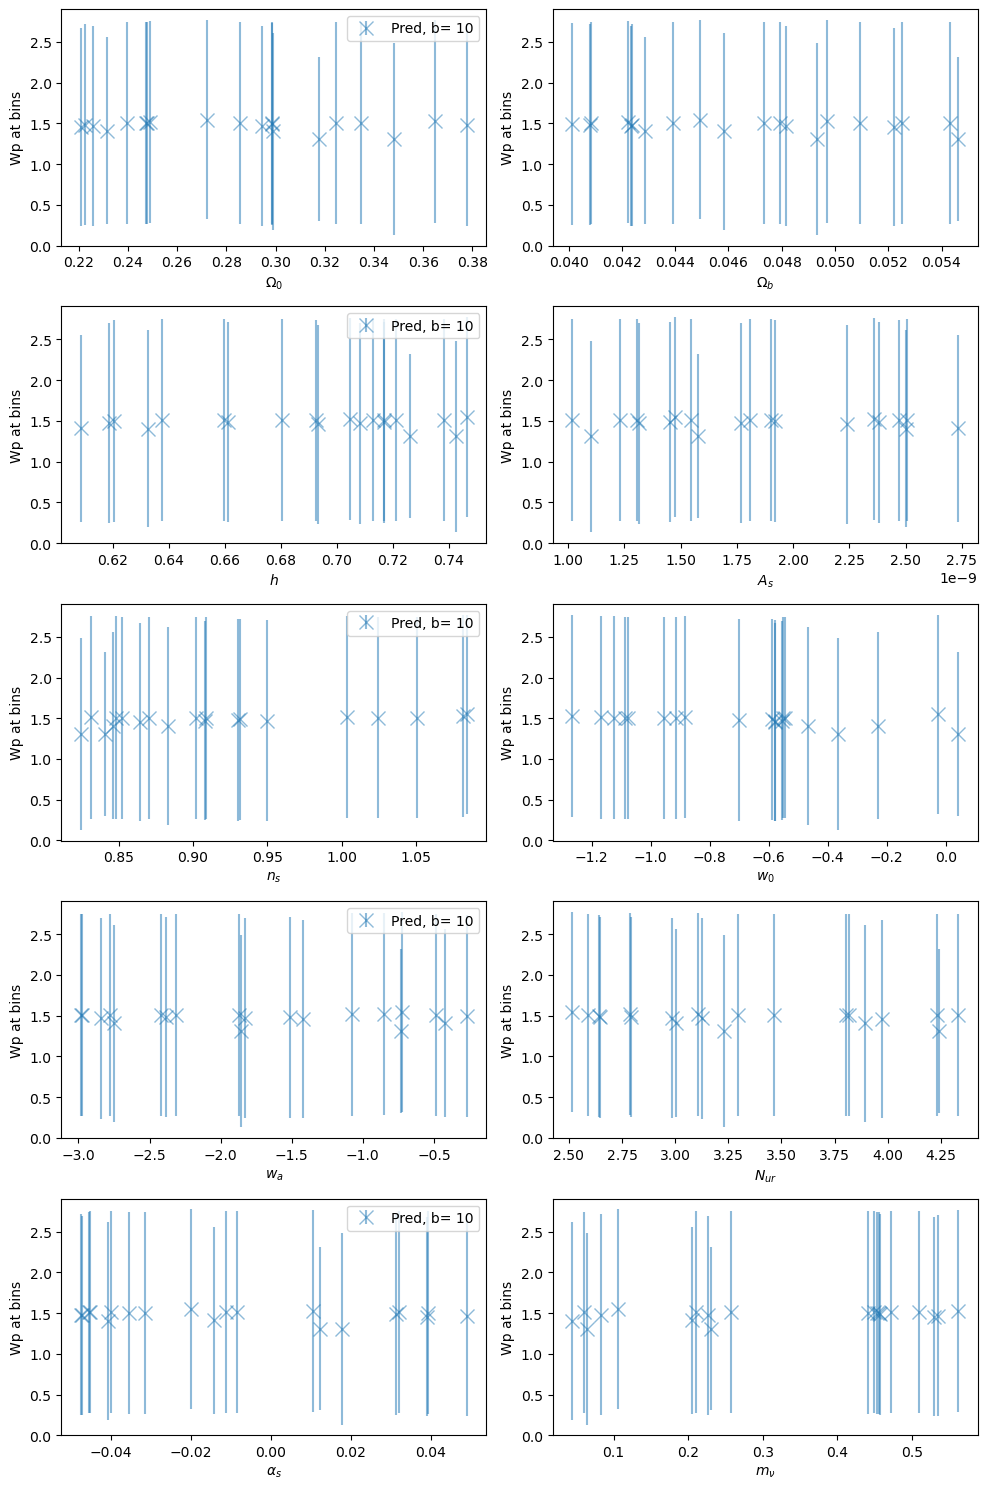

In [9]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)

plot_wp_emu = plot.PlotProjCorrEmu()

plot_wp_emu.pred_truth_input_space(n_out=20)

This doesn't tell us much since it is not 1D paramter changes. 

## 1D Parameter change:

12/01/2024 02:53:51 PM Total snapshots: 555
12/01/2024 02:53:51 PM Total snapshots: 555
12/01/2024 02:53:51 PM Total snapshots: 555
12/01/2024 02:53:51 PM Load IC file from all_ICs.json
12/01/2024 02:53:51 PM Load IC file from all_ICs.json
12/01/2024 02:53:51 PM Load IC file from all_ICs.json
12/01/2024 02:53:51 PM Cleaning the negative bins with linear interpolation
12/01/2024 02:53:51 PM Cleaning the negative bins with linear interpolation
12/01/2024 02:53:51 PM Cleaning the negative bins with linear interpolation
12/01/2024 02:53:51 PM Cleaning the negative bins with linear interpolation
12/01/2024 02:53:51 PM Cleaning the negative bins with linear interpolation
12/01/2024 02:53:51 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
12/01/2024 02:53:51 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
12/01/2024 02:53:51 PM X shape: (555, 10), Y shape: (555, 16), model_err shape: (555, 16)
12/01/2024 02:53:55 PM Total snapshots: 555
12/01/2024 0

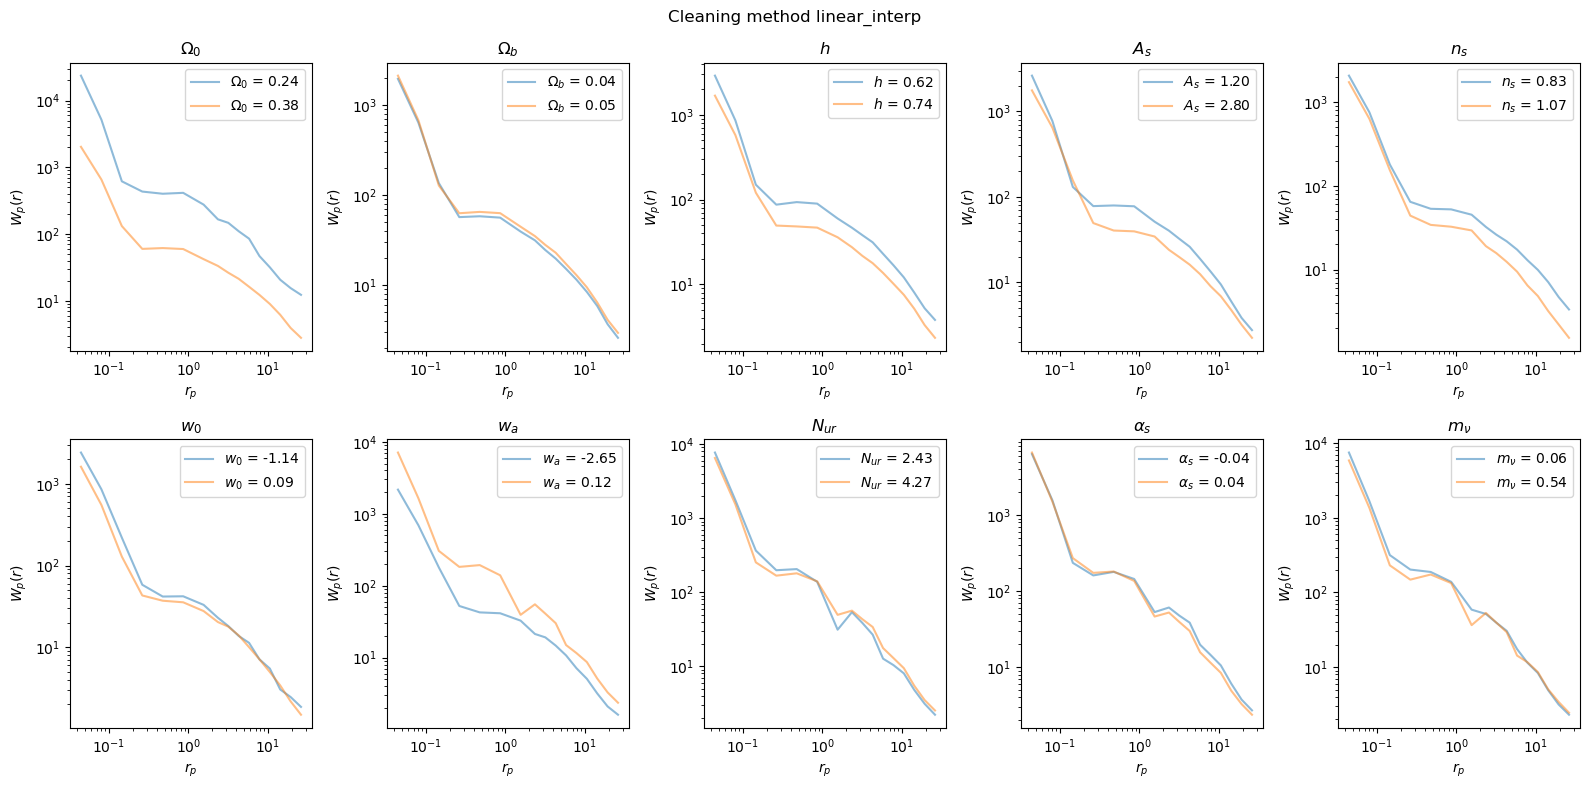

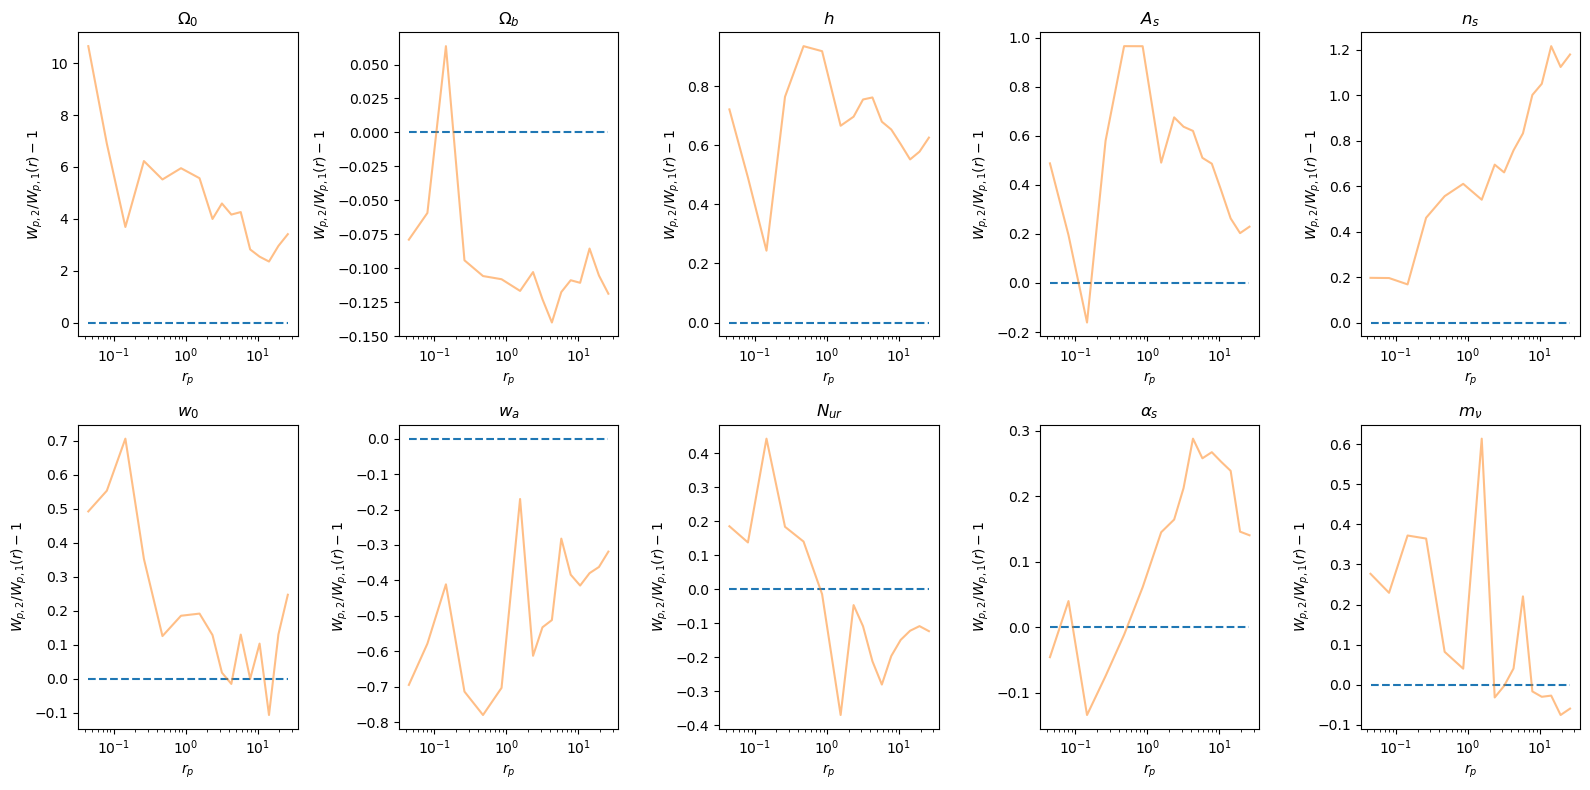

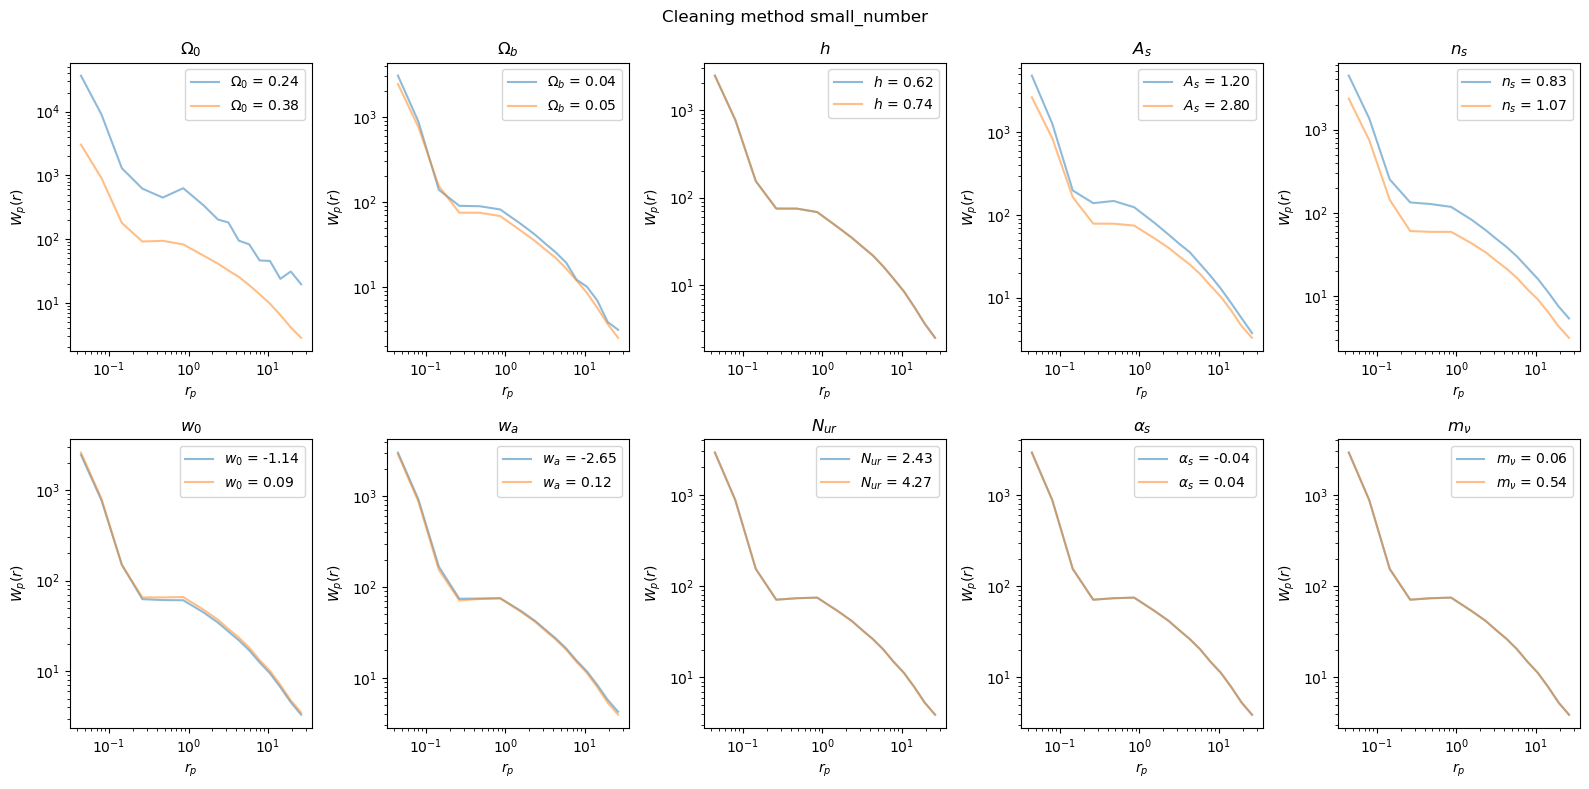

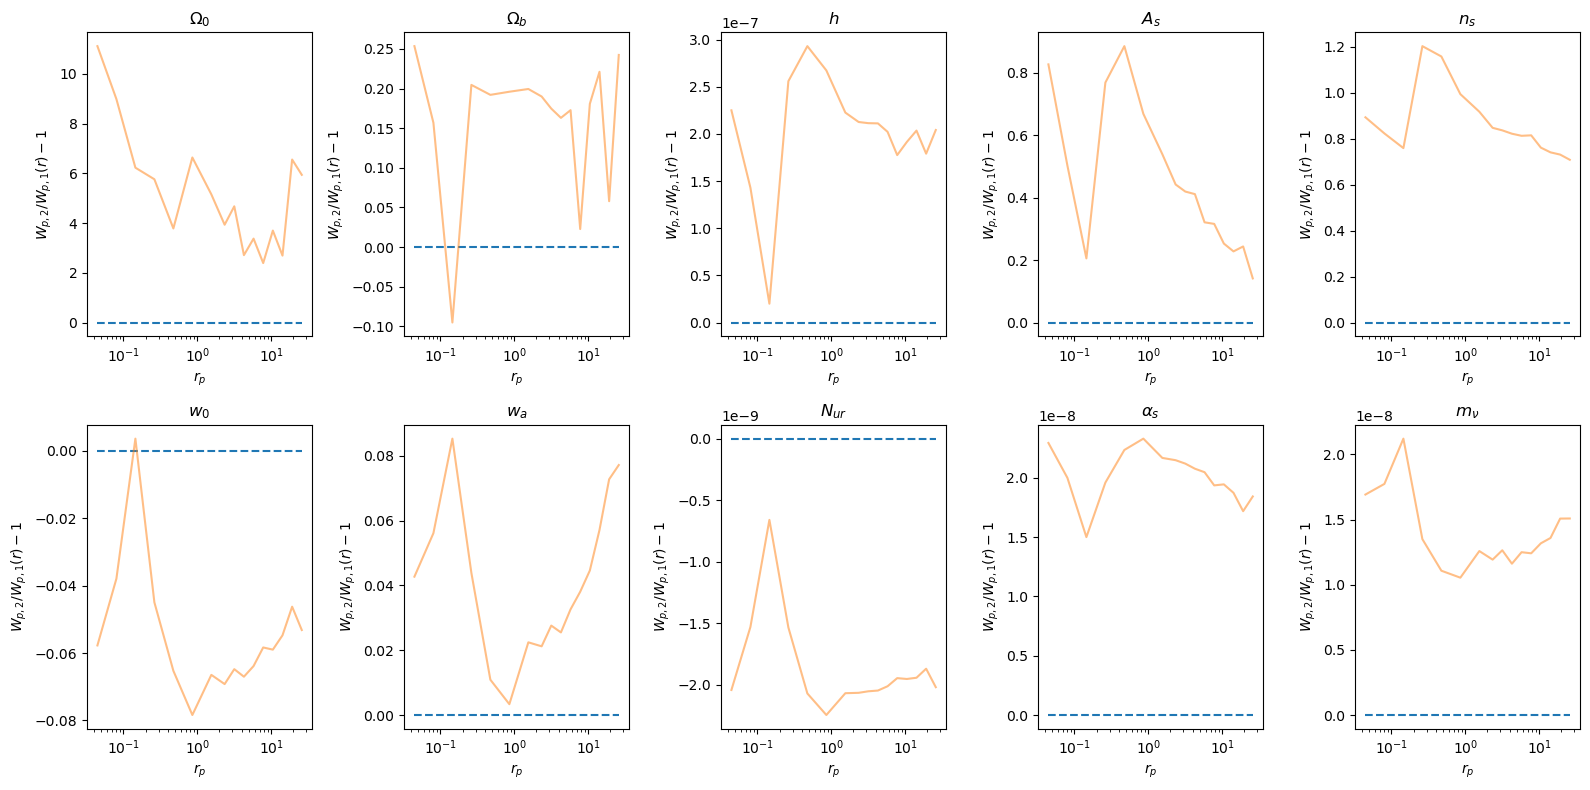

In [2]:
import numpy as np
from glob import glob
from os import path as op
import importlib
import plot
importlib.reload(plot)

plot_wp_emu = plot.PlotProjCorrEmu()
plot_wp_emu.param_sensitivity(cleaning_method='linear_interp')
plot_wp_emu.param_sensitivity(cleaning_method='small_number')

## Test single-fid:

2024-11-25 15:12:35.907481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 15:12:35.999594: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-25 15:12:35.999613: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-25 15:12:36.025632: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 15:12:36.472613: W tensorflow/stream_executor/platform/de

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value   │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0     │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (2,)    │ float64 │ [1. 1.] │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0     │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

11/25/2024 03:12:44 PM trained hyperparameters: lengthscales: [0.24193003 0.18997713]
11/25/2024 03:12:44 PM trained hyperparameters: variance: 1542.8274951963524


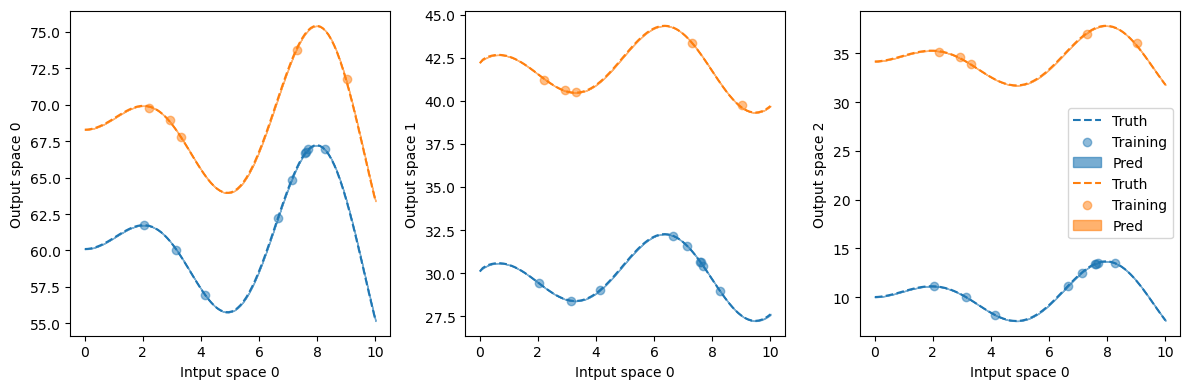

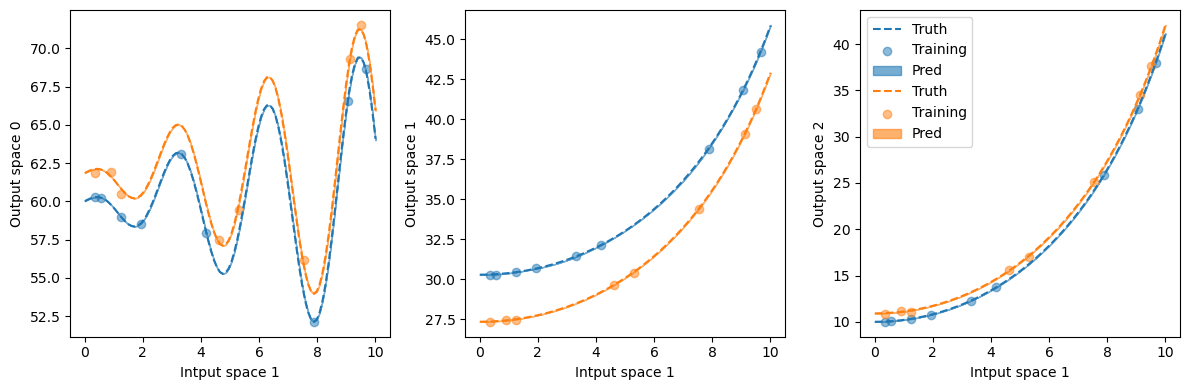

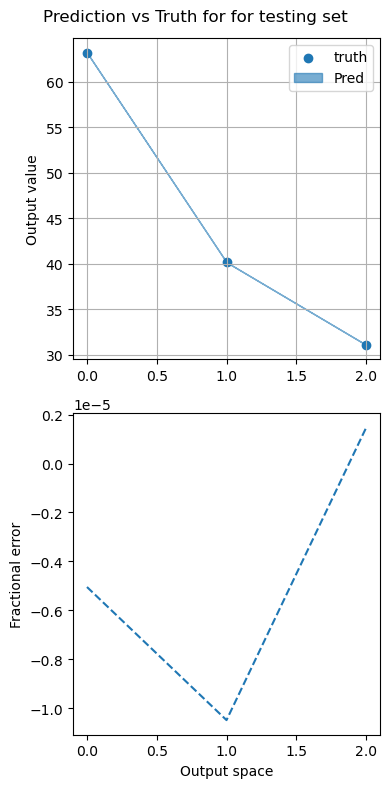

In [1]:
import importlib
import plot
import numpy as np
importlib.reload(plot)


plot_test = plot.PlotTestEmus(n_samples=700)

#plot_test.pred_truth()
plot_test.pred_truth_input_space(X=np.array([4, 9])[None, :])
plot_test.pred_truth_output_space(X=np.array([4, 9])[None, :])

## Explore wht it SF GP fails:

2024-11-25 16:24:36.050048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 16:24:36.140979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-25 16:24:36.141001: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-25 16:24:36.166671: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-25 16:24:36.608881: W tensorflow/stream_executor/platform/de

╒═════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═════════╤═════════╤═════════╕
│ name                    │ class     │ transform        │ prior   │ trainable   │ shape   │ dtype   │ value   │
╞═════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═════════╪═════════╪═════════╡
│ GPR.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()      │ float64 │ 1.0     │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.kernel.lengthscales │ Parameter │ Softplus         │         │ True        │ (2,)    │ float64 │ [1. 1.] │
├─────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ GPR.likelihood.variance │ Parameter │ Softplus + Shift │         │ True        │ ()      │ float64 │ 1.0     │
╘═════════════════════════╧═══════════╧══════════════════╧═════════╧═════════════╧═════════╧════

11/25/2024 04:24:40 PM trained hyperparameters: lengthscales: [4.77438219 0.1245563 ]
11/25/2024 04:24:40 PM trained hyperparameters: variance: 69.16609072112733


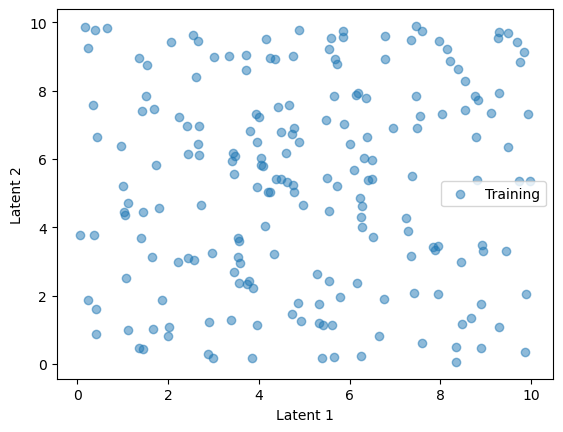

In [1]:
import importlib
import plot
import numpy as np
importlib.reload(plot)


plot_test = plot.PlotTestEmus()

#plot_test.pred_truth()
plot_test.latent_space()